### Grading
 <br>
**** 

### Validate Button
 

*** 

# Clustering RNA sequences to identify cancer types

We will use clustering algorithms on RNA sequence data to identify cancer types.
Since the [whole data](https://www.synapse.org/#!Synapse:syn4301332) (from [Cancer Genome Atlas Pan-Cancer project](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3919969/)) is very big, we will use a [subset data from UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#). The subset data contains only 5 labels; BRCA, KIRC, COAD, LUAD and PRAD. The meanings of those labels are as below.

|Abbreviation|Cancer|
|:----:|:-------:|
|LUSC|Lung squamous cell carcinoma |
|READ |Rectum adenocarcinoma |
|GBM |Glioblastoma multiforme|
|BLCA |Bladder Urothelial Carcinoma|
|UCEC |Uterine Corpus Endometrioid Carcinoma|
|COAD |Colon adenocarcinoma|
|OV |Ovarian serous cystadenocarcinoma|
|LAML |Acute Myeloid Leukemia|
|HNSC |Head and Neck squamous cell carcinoma|
|LUAD |Lung adenocarcinoma|
|BRCA |Breast invasive carcinoma|
|KIRC |Kidney renal clear cell carcinoma|

Although we can use the data for supervised learning model training, we will not use these labels for training, but use them for evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [2]:
import random
from itertools import permutations
from scipy.optimize import linear_sum_assignment

In [3]:
# Read data. Do not change the variable names (data, label)
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

### A. [Peer Review] Perform basic data inspection or EDA on the pandas dataframe.
- How many observations?
- How many features?

In [4]:
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [5]:
data.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20531)

In [6]:
# The specific value you want to check
specific_value = 'COAD'

# Check if the value exists in the DataFrame
is_value_present = data.isin([specific_value]).any().any()

if is_value_present:
    print(f"The value '{specific_value}' is present in the dataset.")
else:
    print(f"The value '{specific_value}' is not present in the dataset.")

The value 'COAD' is not present in the dataset.


In [7]:
# perform basic data inspection such as getting the number of observations and number of features
# you can also display part of the dataframe or run data.info() 
# your code here
len(data), len(data.columns)

(801, 20531)

- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What do those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br>
Answer the Peer Review question about this section. 

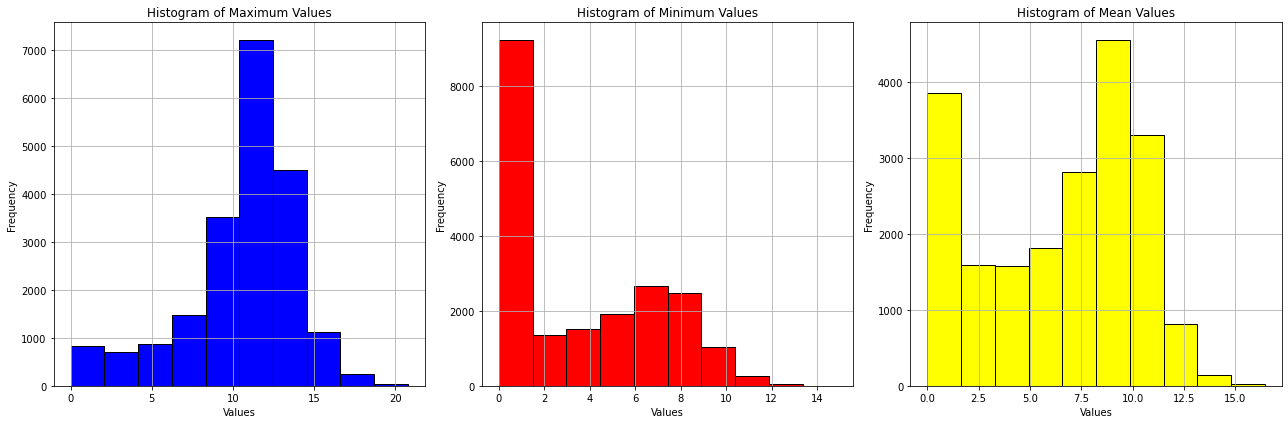

In [8]:
# draw histograms of mean, max and min values in each feature 
# your code here
# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for maximum values
data.max().hist(ax=ax1, color='blue', edgecolor='black')
ax1.set_title('Histogram of Maximum Values')
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')

# Plot histogram for minimum values
data.min().hist(ax=ax2, color='red', edgecolor='black')
ax2.set_title('Histogram of Minimum Values')
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')

# Plot histogram for mean values
data.mean().hist(ax=ax3, color='yellow', edgecolor='black')
ax3.set_title('Histogram of Mean Values')
ax3.set_xlabel('Values')
ax3.set_ylabel('Frequency')


# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
data.min()

gene_0        0.000000
gene_1        0.000000
gene_2        0.000000
gene_3        5.009284
gene_4        8.435999
                ...   
gene_20526    9.045255
gene_20527    7.530141
gene_20528    7.864533
gene_20529    0.593975
gene_20530    0.000000
Length: 20531, dtype: float64

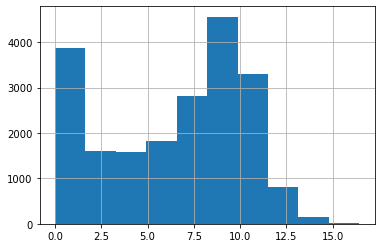

In [10]:
data.mean().hist()

- If we were to train a "supervised" learning model, how would you deal with such large feature dimension? 
- Even after feature dimension reduction, still the number of useful features may be enormous. How it would impact performance or runtime of certain supervised learning algorithms? Which algorithms would suffer from high dimension features than others and why? 
- How it would impact performance or runtime of an unsupervised learning algorithm?
- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br> <br>
Anwer these questions in this week's Peer Review assignment. 

### B. [Peer Review] Build a hierarchical clustering model
Let's build a model using hierarchical clustering. Hierarchical clustering module is available from `sklearn.cluster.AgglomerativeClustering`. You can choose linkage type and metric. Please check its documentation for more details.

**a) Number of clusters vs distance threshold**
Oftentimes hierarchical clustering does not need to know the number of clusters in advance. Instead, one needs to choose threshold distance/similarity to cut the dendrogram later. The AgglomerativeClustering module lets you specify either the number of clusters (n_clusters) or the threshold (distance_threshold). Based on our data, which should we choose to set to which value and why? <br> <br>
Answer this question in the Peer Review assignment. 

#### b) Guess which metric?
Can you guess which metric to use (distance-based vs. similarity-based) and why? 
This question is not graded, but we encourage you to share your thoughts with the class. See the ungraded discussion prompt for this week's material. 

#### c) Build a model
Build a model using n_clusters=5 option. Choose any metric and linkage type at first. Display the clustering result labels (you can just print out the result). Do not change the variable (model) name. Answer the question about this section in the Peer Review.

In [112]:
# build a model using n_clusters=5 option
model=None
# your code here
# model = AgglomerativeClustering(n_clusters = 5).fit(data)
start_time = time.time()
model = AgglomerativeClustering(n_clusters = 5, linkage = 'average', affinity='manhattan').fit(data)
end_time = time.time()
model.labels_
start_time - end_time

-6.215034484863281

In [111]:
start_time = time.time()
model2 = KMeans(n_clusters=5)

# Fit the KMeans model to your data
model2.fit(data)

end_time = time.time()

# Get the cluster labels for each data point
model2.labels_

end_time - start_time

9.49167537689209

#### d) Label permuation
In clustering, the labels get assigned randomly, so the label numbering won't match the ground truth necessarily. Write a function below to find best matching label ordering based on the accuracy. Do not change the variable names. Answer the question about this section in the Peer Review. 

In [22]:
label['Class'].values

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA', 'PRAD', 'KIRC', 'PRAD',
       'BRCA', 'PRAD', 'BRCA', 'KIRC', 'PRAD', 'BRCA', 'BRCA', 'BRCA',
       'LUAD', 'KIRC', 'KIRC', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA',
       'KIRC', 'LUAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA',
       'KIRC', 'PRAD', 'PRAD', 'KIRC', 'KIRC', 'BRCA', 'PRAD', 'COAD',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'PRAD', 'COAD', 'BRCA',
       'BRCA', 'COAD', 'KIRC', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'LUAD',
       'PRAD', 'COAD', 'BRCA', 'PRAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'KIRC', 'PRAD', 'COAD',
       'BRCA', 'PRAD', 'BRCA', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'BRCA', 'PRAD', 'BRCA', 'BRCA', 'KIRC', 'BRCA', 'KIRC',
       'LUAD', 'KIRC', 'LUAD', 'COAD', 'LUAD', 'LUAD', 'PRAD', 'BRCA',
      

In [105]:

# import itertools

def label_permute_compare(ytdf,yp,n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
# your code here
    
    # Get the true labels
    true_labels = ytdf['Class'].values
    
    # Map the string labels to integers
    label_mapping = {label: idx for idx, label in enumerate(np.unique(true_labels))}
    true_labels_mapped = np.array([label_mapping[label] for label in true_labels])

    # Create a confusion matrix between true labels and predicted labels
    cm = confusion_matrix(true_labels_mapped, yp)

    # Apply the Hungarian algorithm (linear sum assignment) to minimize mismatches
    row_ind, col_ind = linear_sum_assignment(-cm)

    # Map the predicted labels using the optimal assignment
    best_pred_labels = np.array([col_ind[label] for label in yp])

    # Calculate accuracy using accuracy_score from sklearn
    best_accuracy = accuracy_score(true_labels_mapped, best_pred_labels)

    # The best permutation is the column indices after the assignment
    best_perm = tuple(col_ind)

    return best_perm, best_accuracy, cm

In [81]:
labelorder, acc = label_permute_compare(label, model.labels_)
print(labelorder, acc)

ValueError: too many values to unpack (expected 2)

#### e) Check confusion matrix
Use sklearn's confusion matrix and display the results. Answer the Peer Review question about this section.  

In [109]:
yp = model2.labels_
ytdf = label
label_permute_compare(ytdf,yp,n=5)

((1, 4, 2, 3, 0),
 0.3545568039950062,
 array([[  0, 300,   0,   0,   0],
        [  0,   0,   0,   2,  76],
        [  0,   1, 145,   0,   0],
        [  0,   2,   0, 139,   0],
        [136,   0,   0,   0,   0]]))

In [ ]:
# display confusion matrix here 
# your code here
confusion_matrix(ytdf, yp)

#### f) Change linkage method and distance metric. Which ones lead the best performance? Print out the accuracy and confusion matrix for the best model.
<br> Answer the Peer Review questions about this section. 

In [ ]:
# programmatically evaluate which linkage method and distance metric lead to the best performance
# your code here


### C. What about k-means clustering?
Can we apply kmeans clustering on this data? Which clustering methods give a better performance? Is kmeans faster or slower?

In [ ]:
# try to apply kmeans clustering on this data
# time kmeans to compare to hierarchical clustering 
# your code here
